In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm
from sklearn.metrics import r2_score, mean_squared_error
import string 

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction

In [2]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 8

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

In [3]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
p_selected_feat_dir = os.path.join(datadir, 'p_models', 'selected_features_constHP')
s_selected_feat_dir = os.path.join(datadir, 's_models', 'selected_features_constHP')

In [ ]:
ypml_amps = pd.read_csv(f'../../data/catalogs/yellowstone.amps.ypml-v5.2024.csv')

In [5]:
stations = ypml_amps['Sta'].unique()

In [6]:
stations

array(['LKWY', 'YFT', 'YUF', 'YNR', 'YMR', 'YHB', 'BOZ', 'BW06', 'AHID',
       'LOHW'], dtype=object)

In [8]:
p_test_preds_df = combine_prediction_files(stations, p_selected_feat_dir,'P', 'test')
p_holdout_preds_df = combine_prediction_files(stations, p_selected_feat_dir,'P', 'holdout')


/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/BOZ.P.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/BW06.P.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/AHID.P.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/LOHW.P.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/BOZ.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/BW06.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/AHID.P.pre

In [7]:
s_test_preds_df = combine_prediction_files(stations, s_selected_feat_dir,'S', 'test')
s_holdout_preds_df = combine_prediction_files(stations, s_selected_feat_dir,'S', 'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/BOZ.S.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/BW06.S.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/AHID.S.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/LOHW.S.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/BOZ.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/BW06.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/AHID.S.pre

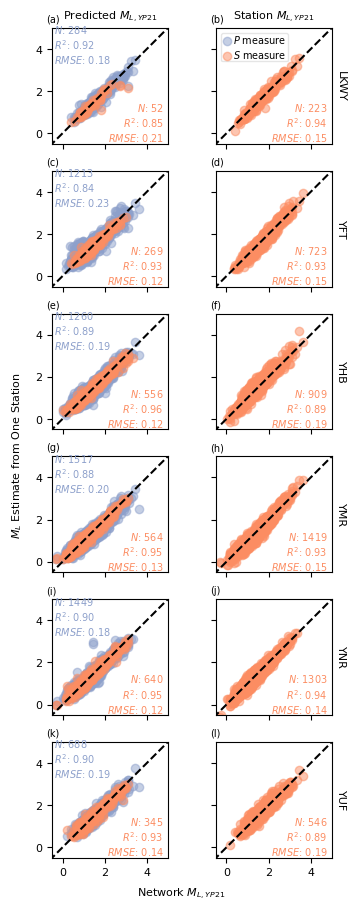

In [ ]:
p_stats = np.sort(p_test_preds_df.station.unique())
fig, axes = plt.subplots(len(p_stats), 2,
                          constrained_layout=True,
                          figsize=(3.5, 9))
ypml_color = '#fc8d62' #'#66c2a5' #'#998ec3'
s_color ='#fc8d62' # '#66c2a5' #'#f1a340'
p_color = '#8da0cb' ##66c2a5' #'#fc8d62' #'#998ec3'

for i in range(0, p_stats.shape[0]):
    if i == 0:
        axes[i][0].set_title('Predicted $M_{L,YP21}$')
    stat = p_stats[i]
    p_stat_df = pd.concat([p_test_preds_df[p_test_preds_df['station'] == stat],
                         p_holdout_preds_df[p_holdout_preds_df['station'] == stat]])
    evids = p_stat_df.Evid.values
    s_stat_df = pd.concat([s_test_preds_df[s_test_preds_df['station'] == stat],
                         s_holdout_preds_df[s_holdout_preds_df['station'] == stat]])
    s = axes[i][0].scatter(p_stat_df['magnitude'], 
                       p_stat_df['predicted_magnitude'],
                       alpha=0.5,
                       color=p_color,
                       label='$\it{P}$ measure')
    if len(s_stat_df) > 0:
        axes[i][0].scatter(s_stat_df['magnitude'], 
                           s_stat_df['predicted_magnitude'],
                            alpha=0.5,
                            color=s_color)
        evids = np.unique(np.concatenate([evids, s_stat_df['Evid'].values]))

    p_r2 = r2_score(p_stat_df['magnitude'],
                       p_stat_df['predicted_magnitude'])    
    p_rmse = mean_squared_error(p_stat_df['magnitude'],
                        p_stat_df['predicted_magnitude'], 
                        squared=False
                        )   
    
    s_r2 = r2_score(s_stat_df['magnitude'],
                       s_stat_df['predicted_magnitude'])    
    s_rmse = mean_squared_error(s_stat_df['magnitude'],
                        s_stat_df['predicted_magnitude'], 
                        squared=False
                        )   
    axes[i][0].plot(np.arange(-1, 6), 
                    np.arange(-1, 6),
                      color='k',
                      linestyle='--')
    axes[i][0].set_aspect('equal', adjustable='box')
    axes[i][0].tick_params(axis='both', which='major', labelsize=8)
    axes[i][0].set_ylim([-0.5, 5])
    axes[i][0].set_xlim([-0.5, 5])
    axes[i][0].set_xticks([0, 2, 4])
    axes[i][0].set_yticks([0, 2, 4])

    axes[i][0].text(-0.4, 3.3,
                f"$N$:{p_stat_df.shape[0]: 0.0f}\n$R^2$:{p_r2: 0.2f}\n$RMSE$:{p_rmse: 0.2f}",
                color=p_color,)
    
    axes[i][0].text(4.8, -0.4,
                    f"$N$:{s_stat_df.shape[0]: 0.0f}\n$R^2$:{s_r2: 0.2f}\n$RMSE$:{s_rmse: 0.2f}", 
                    color=s_color,
                    horizontalalignment='right')
                #bbox=dict(facecolor='white', alpha=0.5, edgecolor='white')) 
    
    if i == 0:
        axes[i][1].set_title('Station $M_{L,YP21}$')
    ypml_stat_df = ypml_amps[(ypml_amps['Sta'] == stat) & (ypml_amps.Evid.isin(evids))]

    ypml_r2 = r2_score(ypml_stat_df['Event-Mean-YPML-S'],
                       ypml_stat_df['Station-YPML-S'])    
    ypml_rmse = mean_squared_error(ypml_stat_df['Event-Mean-YPML-S'],
                        ypml_stat_df['Station-YPML-S'], 
                        squared=False
                        )   
    s1 = axes[i][1].scatter(ypml_stat_df['Event-Mean-YPML-S'], 
                       ypml_stat_df['Station-YPML-S'],
                       alpha=0.5,
                       color=ypml_color,
                       label='$\it{S}$ measure')
    axes[i][1].set_aspect('equal', adjustable='box')
    axes[i][1].plot(np.arange(-1, 6), 
                np.arange(-1, 6),
                    color='k',
                    linestyle='--')
    axes[i][1].tick_params(axis='both', which='major', labelsize=8)
    axes[i][1].set_ylim([-0.5, 5])
    axes[i][1].set_xlim([-0.5, 5])
    axes[i][1].set_xticks([0, 2, 4])
    axes[i][1].set_yticks([0, 2, 4])

    axes[i][1].text(4.8, -0.4,
                f"$N$:{ypml_stat_df.shape[0]: 0.0f}\n$R^2$:{ypml_r2: 0.2f}\n$RMSE$:{ypml_rmse: 0.2f}", 
                color=s_color,
                horizontalalignment='right')
    axes[i][1].yaxis.set_label_position("right")
    axes[i][1].set_ylabel(stat, rotation=-90, labelpad=10.0)

    if i == 0:
            handles = [s, s1]

axes[0][1].legend(handles=handles,
                  loc='upper left',
                  borderpad=0.09,
                  handletextpad=0.2,
                  handlelength=1,
                  labelspacing=0.3,
                  framealpha=0.5)

for i in range(axes.shape[0]):
    axes[i][1].set_yticklabels([])

for ax in axes.flatten()[:-2]:
    ax.set_xticklabels([])
    

subpanel_labels = list(string.ascii_lowercase)
for i, ax in enumerate(axes.flatten()):
    ax.text(-0.05, 1.05, f'({subpanel_labels[i]})', 
    transform=ax.transAxes,)

fig.supylabel("$M_L$ Estimate from One Station")
fig.supxlabel("Network $M_{L,YP21}$")
fig.savefig('../../figures/comparePredictedandYP21StationML.png', dpi=300, bbox_inches='tight')

In [31]:
# I had a bug in the original plot that was filtering every station's YMPL events to those used for stat YUF 
for stat in np.sort(p_test_preds_df.station.unique()):
    print(stat)
    accidentally_fixed_stat = "YUF"
    p_stat_df = pd.concat([p_test_preds_df[p_test_preds_df['station'] == accidentally_fixed_stat],
                                p_holdout_preds_df[p_holdout_preds_df['station'] == accidentally_fixed_stat]])
    evids = p_stat_df.Evid.values
    s_stat_df = pd.concat([s_test_preds_df[s_test_preds_df['station'] == accidentally_fixed_stat],
                        s_holdout_preds_df[s_holdout_preds_df['station'] == accidentally_fixed_stat]])

    p_r2 = r2_score(p_stat_df['magnitude'],
                            p_stat_df['predicted_magnitude'])    
    p_rmse = mean_squared_error(p_stat_df['magnitude'],
                                p_stat_df['predicted_magnitude'], 
                                squared=False
                                )   
    s_r2 = r2_score(s_stat_df['magnitude'],
                    s_stat_df['predicted_magnitude'])    
    s_rmse = mean_squared_error(s_stat_df['magnitude'],
                                s_stat_df['predicted_magnitude'], 
                                squared=False
                                )  
    if len(s_stat_df) > 0:
        evids = np.unique(np.concatenate([evids, s_stat_df['Evid'].values]))

    ypml_stat_df = ypml_amps[(ypml_amps['Sta'] == stat) & (ypml_amps.Evid.isin(evids))]

    ypml_r2 = r2_score(ypml_stat_df['Event-Mean-YPML-S'],
                    ypml_stat_df['Station-YPML-S'])    
    ypml_rmse = mean_squared_error(ypml_stat_df['Event-Mean-YPML-S'],
                                ypml_stat_df['Station-YPML-S'], 
                                squared=False)   
    
    #print(f"P: N={len(p_stat_df)}, R2={p_r2:0.2f}, RMSE={p_rmse:0.2f}")
    #print(f"S: N={len(s_stat_df)}, R2={s_r2:0.2f}, RMSE={s_rmse:0.2f}")
    print(f"YPML: N={len(ypml_stat_df)}, YPML: R2={ypml_r2:0.2f}, RMSE={ypml_rmse:0.2f}")

LKWY
YPML: N=183, YPML: R2=0.94, RMSE=0.17
YFT
YPML: N=293, YPML: R2=0.91, RMSE=0.17
YHB
YPML: N=401, YPML: R2=0.85, RMSE=0.22
YMR
YPML: N=557, YPML: R2=0.91, RMSE=0.18
YNR
YPML: N=503, YPML: R2=0.94, RMSE=0.14
YUF
YPML: N=546, YPML: R2=0.89, RMSE=0.19


In [23]:
# These are what the results should look it if using the correct stations evids
for stat in np.sort(p_test_preds_df.station.unique()):
    print(stat)
    p_stat_df = pd.concat([p_test_preds_df[p_test_preds_df['station'] == stat],
                                p_holdout_preds_df[p_holdout_preds_df['station'] == stat]])
    evids = p_stat_df.Evid.values
    s_stat_df = pd.concat([s_test_preds_df[s_test_preds_df['station'] == stat],
                        s_holdout_preds_df[s_holdout_preds_df['station'] == stat]])

    p_r2 = r2_score(p_stat_df['magnitude'],
                            p_stat_df['predicted_magnitude'])    
    p_rmse = mean_squared_error(p_stat_df['magnitude'],
                                p_stat_df['predicted_magnitude'], 
                                squared=False
                                )   
    s_r2 = r2_score(s_stat_df['magnitude'],
                    s_stat_df['predicted_magnitude'])    
    s_rmse = mean_squared_error(s_stat_df['magnitude'],
                                s_stat_df['predicted_magnitude'], 
                                squared=False
                                )  
    if len(s_stat_df) > 0:
        evids = np.unique(np.concatenate([evids, s_stat_df['Evid'].values]))

    ypml_stat_df = ypml_amps[(ypml_amps['Sta'] == stat) & (ypml_amps.Evid.isin(evids))]

    ypml_r2 = r2_score(ypml_stat_df['Event-Mean-YPML-S'],
                    ypml_stat_df['Station-YPML-S'])    
    ypml_rmse = mean_squared_error(ypml_stat_df['Event-Mean-YPML-S'],
                                ypml_stat_df['Station-YPML-S'], 
                                squared=False)   
    
    print(f"P: N={len(p_stat_df)}, R2={p_r2:0.2f}, RMSE={p_rmse:0.2f}")
    print(f"S: N={len(s_stat_df)}, R2={s_r2:0.2f}, RMSE={s_rmse:0.2f}")
    print(f"YPML: N={len(ypml_stat_df)}, YPML: R2={ypml_r2:0.2f}, RMSE={ypml_rmse:0.2f}")

LKWY
P: N=284, R2=0.92, RMSE=0.18
S: N=52, R2=0.85, RMSE=0.21
YPML: N=223, YPML: R2=0.94, RMSE=0.15
YFT
P: N=1213, R2=0.84, RMSE=0.23
S: N=269, R2=0.93, RMSE=0.12
YPML: N=723, YPML: R2=0.93, RMSE=0.15
YHB
P: N=1260, R2=0.89, RMSE=0.19
S: N=556, R2=0.96, RMSE=0.12
YPML: N=909, YPML: R2=0.89, RMSE=0.19
YMR
P: N=1517, R2=0.88, RMSE=0.20
S: N=564, R2=0.95, RMSE=0.13
YPML: N=1419, YPML: R2=0.93, RMSE=0.15
YNR
P: N=1449, R2=0.90, RMSE=0.18
S: N=640, R2=0.95, RMSE=0.12
YPML: N=1303, YPML: R2=0.94, RMSE=0.14
YUF
P: N=688, R2=0.90, RMSE=0.19
S: N=345, R2=0.93, RMSE=0.14
YPML: N=546, YPML: R2=0.89, RMSE=0.19


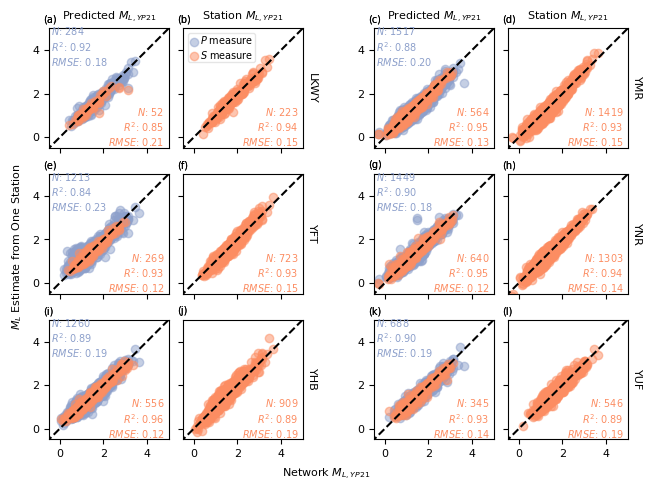

In [ ]:
p_stats = np.sort(p_test_preds_df.station.unique())
fig, axes = plt.subplots(3, 5,
                         constrained_layout=True,
                          width_ratios=[1, 1, 0.2, 1, 1])
                          #figsize=(3.5, 9))
ypml_color = '#fc8d62' #'#66c2a5' #'#998ec3'
s_color ='#fc8d62' # '#66c2a5' #'#f1a340'
p_color = '#8da0cb' ##66c2a5' #'#fc8d62' #'#998ec3'

cnt = 0

handles = []
for x_ind1 in [0, 3]:
    x_ind2 = x_ind1 + 1
    for y_ind in range(0, 3):
        if y_ind == 0:
            axes[y_ind][x_ind1].set_title('Predicted $M_{L,YP21}$')
        stat = p_stats[cnt]
        p_stat_df = pd.concat([p_test_preds_df[p_test_preds_df['station'] == stat],
                            p_holdout_preds_df[p_holdout_preds_df['station'] == stat]])
        evids = p_stat_df.Evid.values
        s_stat_df = pd.concat([s_test_preds_df[s_test_preds_df['station'] == stat],
                            s_holdout_preds_df[s_holdout_preds_df['station'] == stat]])
        s = axes[y_ind][x_ind1].scatter(p_stat_df['magnitude'], 
                        p_stat_df['predicted_magnitude'],
                        alpha=0.5,
                        color=p_color,
                        label='$\it{P}$ measure')
        if len(s_stat_df) > 0:
            axes[y_ind][x_ind1].scatter(s_stat_df['magnitude'], 
                            s_stat_df['predicted_magnitude'],
                                alpha=0.5,
                                color=s_color)
            evids = np.unique(np.concatenate([evids, s_stat_df['Evid'].values]))


        p_r2 = r2_score(p_stat_df['magnitude'],
                        p_stat_df['predicted_magnitude'])    
        p_rmse = mean_squared_error(p_stat_df['magnitude'],
                            p_stat_df['predicted_magnitude'], 
                            squared=False
                            )   
        
        s_r2 = r2_score(s_stat_df['magnitude'],
                        s_stat_df['predicted_magnitude'])    
        s_rmse = mean_squared_error(s_stat_df['magnitude'],
                            s_stat_df['predicted_magnitude'], 
                            squared=False
                            )   
        axes[y_ind][x_ind1].plot(np.arange(-1, 6), 
                        np.arange(-1, 6),
                        color='k',
                        linestyle='--')
        axes[y_ind][x_ind1].set_aspect('equal', adjustable='box')
        axes[y_ind][x_ind1].tick_params(axis='both', which='major', labelsize=8)
        axes[y_ind][x_ind1].set_ylim([-0.5, 5])
        axes[y_ind][x_ind1].set_xlim([-0.5, 5])
        axes[y_ind][x_ind1].set_xticks([0, 2, 4])
        axes[y_ind][x_ind1].set_yticks([0, 2, 4])

        axes[y_ind][x_ind1].text(-0.4, 3.3,
                    f"$N$:{p_stat_df.shape[0]: 0.0f}\n$R^2$:{p_r2: 0.2f}\n$RMSE$:{p_rmse: 0.2f}",
                    color=p_color,)
        
        axes[y_ind][x_ind1].text(4.8, -0.4,
                        f"$N$:{s_stat_df.shape[0]: 0.0f}\n$R^2$:{s_r2: 0.2f}\n$RMSE$:{s_rmse: 0.2f}", 
                        color=s_color,
                        horizontalalignment='right')
                    #bbox=dict(facecolor='white', alpha=0.5, edgecolor='white')) 

        if y_ind < 2:
            axes[y_ind][x_ind1].set_xticklabels([])

        if y_ind == 0:
            axes[y_ind][x_ind2].set_title('Station $M_{L,YP21}$')

        ypml_stat_df = ypml_amps[(ypml_amps['Sta'] == stat) & (ypml_amps.Evid.isin(evids))]

        ypml_r2 = r2_score(ypml_stat_df['Event-Mean-YPML-S'],
                        ypml_stat_df['Station-YPML-S'])    
        ypml_rmse = mean_squared_error(ypml_stat_df['Event-Mean-YPML-S'],
                            ypml_stat_df['Station-YPML-S'], 
                            squared=False
                            )   
        s2 = axes[y_ind][x_ind2].scatter(ypml_stat_df['Event-Mean-YPML-S'], 
                        ypml_stat_df['Station-YPML-S'],
                        alpha=0.5,
                        color=ypml_color,
                        label='$\it{S}$ measure')
        axes[y_ind][x_ind2].set_aspect('equal', adjustable='box')
        axes[y_ind][x_ind2].plot(np.arange(-1, 6), 
                    np.arange(-1, 6),
                        color='k',
                        linestyle='--')
        axes[y_ind][x_ind2].tick_params(axis='both', which='major', labelsize=8)
        axes[y_ind][x_ind2].set_ylim([-0.5, 5])
        axes[y_ind][x_ind2].set_xlim([-0.5, 5])
        axes[y_ind][x_ind2].set_xticks([0, 2, 4])
        axes[y_ind][x_ind2].set_yticks([0, 2, 4])

        axes[y_ind][x_ind2].text(4.8, -0.4,
                    f"$N$:{ypml_stat_df.shape[0]: 0.0f}\n$R^2$:{ypml_r2: 0.2f}\n$RMSE$:{ypml_rmse: 0.2f}", 
                    color=s_color,
                    horizontalalignment='right')
        axes[y_ind][x_ind2].yaxis.set_label_position("right")
        axes[y_ind][x_ind2].set_ylabel(stat, rotation=-90, labelpad=10.0)

        if y_ind < 2:
            axes[y_ind][x_ind2].set_xticklabels([])

        axes[y_ind][x_ind2].set_yticklabels([]) 

        if cnt == 0:
            handles = [s, s2]

        cnt+=1

    for y_ind in range(3):
        axes[y_ind][2].axis('off')

    axes[0][1].legend(handles=handles,
                    loc='upper left',
                    borderpad=0.09,
                    handletextpad=0.2,
                    handlelength=1,
                    labelspacing=0.3,
                    framealpha=0.5)

    subpanel_labels = list(string.ascii_lowercase)
    for i, ax in enumerate(axes[:, np.array([0, 1, 3, 4])].flatten()):
        ax.text(-0.05, 1.05, f'({subpanel_labels[i]})', 
        transform=ax.transAxes,)

    fig.supylabel("$M_L$ Estimate from One Station")
    fig.supxlabel("Network $M_{L,YP21}$")

fig.savefig('../../figures/comparePredictedandYP21StationMLSquare.png', dpi=300, bbox_inches='tight')